In [103]:
%pip install pandas scikit-learn matplotlib mlflow xgboost numpy

Note: you may need to restart the kernel to use updated packages.


In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("../data/raw/WA_Fn-UseC_-HR-Employee-Attrition.csv")

df.info()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [92]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [93]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

📉 Categorical Features¶


In [73]:
#Categorical Features

object_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("====================================")
object_col.remove('Attrition')

Attrition : ['Yes' 'No']
Attrition
No     1233
Yes     237
Name: count, dtype: int64
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
Department : ['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
Gender : ['Female' 'Male']
Gender
Male      882
Female    588
Name: count, dtype: int64
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representativ

In [94]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df["Attrition"] = label.fit_transform(df.Attrition)

📉 Numerical Features

In [96]:
#📉 Numerical Features
disc_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() < 30:
        print(f"{column} : {df[column].unique()}")
        disc_col.append(column)
        print("====================================")
disc_col.remove('Attrition')

Attrition : [1 0]
DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
Education : [2 1 4 3 5]
EnvironmentSatisfaction : [2 3 4 1]
JobInvolvement : [3 2 4 1]
JobLevel : [2 1 3 4 5]
JobSatisfaction : [4 2 3 1]
NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3]
PercentSalaryHike : [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
PerformanceRating : [3 4]
RelationshipSatisfaction : [1 4 2 3]
StockOptionLevel : [0 1 3 2]
TrainingTimesLastYear : [0 3 2 5 1 4 6]
WorkLifeBalance : [1 3 2 4]
YearsInCurrentRole : [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]
YearsSinceLastPromotion : [ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]
YearsWithCurrManager : [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]


In [97]:
cont_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 30:
        print(f"{column} : Minimum: {df[column].min()}, Maximum: {df[column].max()}")
        cont_col.append(column)
        print("====================================")

Age : Minimum: 18, Maximum: 60
DailyRate : Minimum: 102, Maximum: 1499
HourlyRate : Minimum: 30, Maximum: 100
MonthlyIncome : Minimum: 1009, Maximum: 19999
MonthlyRate : Minimum: 2094, Maximum: 26999
TotalWorkingYears : Minimum: 0, Maximum: 40
YearsAtCompany : Minimum: 0, Maximum: 40


🔨 Data Processing¶


In [98]:
# Transform categorical data into dummies
dummy_col = [column for column in df.drop('Attrition', axis=1).columns if df[column].nunique() < 20]
data = pd.get_dummies(df, columns=dummy_col, drop_first=True, dtype='uint8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Columns: 136 entries, Age to YearsWithCurrManager_17
dtypes: int64(9), uint8(127)
memory usage: 285.8 KB


In [99]:
print(data.shape)

# Remove duplicate Features
data = data.T.drop_duplicates()
data = data.T

# Remove Duplicate Rows
data.drop_duplicates(inplace=True)

print(data.shape)

(1470, 136)
(1470, 136)


In [78]:
data

,Age,Attrition,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany,...,YearsWithCurrManager_8,YearsWithCurrManager_9,YearsWithCurrManager_10,YearsWithCurrManager_11,YearsWithCurrManager_12,YearsWithCurrManager_13,YearsWithCurrManager_14,YearsWithCurrManager_15,YearsWithCurrManager_16,YearsWithCurrManager_17
0,41,Yes,1102,1,1,94,5993,19479,8,6,...,0,0,0,0,0,0,0,0,0,0
1,49,No,279,8,2,61,5130,24907,10,10,...,0,0,0,0,0,0,0,0,0,0
2,37,Yes,1373,2,4,92,2090,2396,7,0,...,0,0,0,0,0,0,0,0,0,0
3,33,No,1392,3,5,56,2909,23159,8,8,...,0,0,0,0,0,0,0,0,0,0
4,27,No,591,2,7,40,3468,16632,6,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,884,23,2061,41,2571,12290,17,5,...,0,0,0,0,0,0,0,0,0,0
1466,39,No,613,6,2062,42,9991,21457,9,7,...,0,0,0,0,0,0,0,0,0,0
1467,27,No,155,4,2064,87,6142,5174,6,6,...,0,0,0,0,0,0,0,0,0,0
1468,49,No,1023,2,2065,63,5390,13243,17,9,...,1,0,0,0,0,0,0,0,0,0


<Axes: >

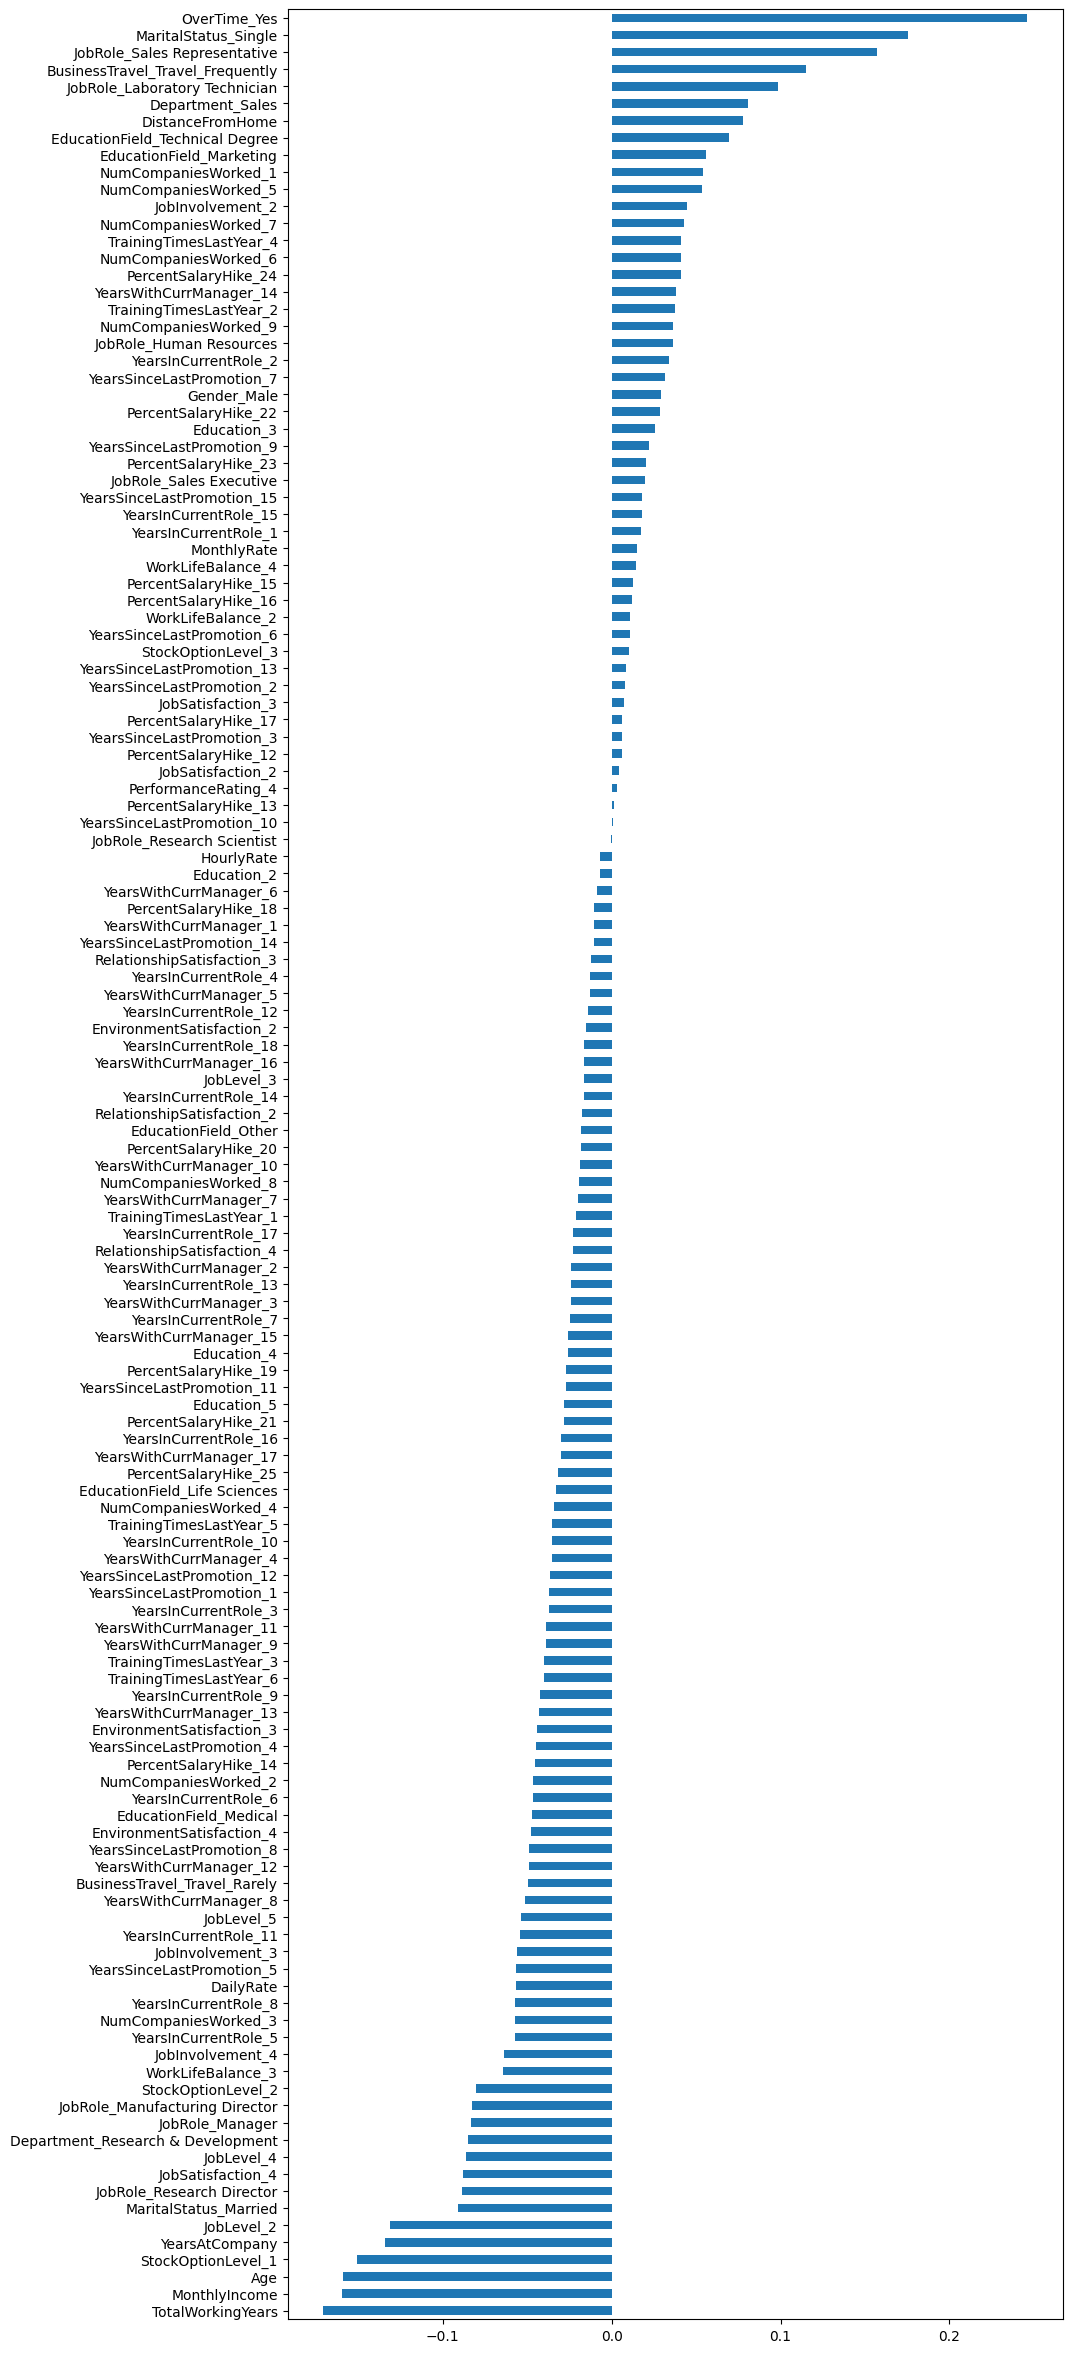

In [100]:
data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values().plot(kind='barh', figsize=(10, 30))

In [105]:
feature_correlation = data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values()
model_col = feature_correlation[np.abs(feature_correlation) > 0.02].index
len(model_col)

92

In [108]:
#🤖 Applying machine learning algorithms¶

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

X = data.drop('Attrition', axis=1)
y = data.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,
                                                    stratify=y)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

In [109]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

In [110]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [111]:
from sklearn.metrics import precision_recall_curve, roc_curve
   
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision/Recall Tradeoff")
    

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    

✔️ Logistic Regression¶


In [113]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train_std, y_train)

evaluate(lr_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[849  14]
 [ 59 107]]
ACCURACY SCORE:
0.9291
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.935022    0.884298  0.929057     0.909660      0.926839
recall       0.983778    0.644578  0.929057     0.814178      0.929057
f1-score     0.958780    0.745645  0.929057     0.852212      0.924397
support    863.000000  166.000000  0.929057  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[348  22]
 [ 43  28]]
ACCURACY SCORE:
0.8526
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.890026   0.560000  0.852608    0.725013      0.836892
recall       0.940541   0.394366  0.852608    0.667453      0.852608
f1-score     0.914586   0.462810  0.852608    0.688698      0.841851
support    370.000000  71.000000  0.852608  441.000000    441.000000


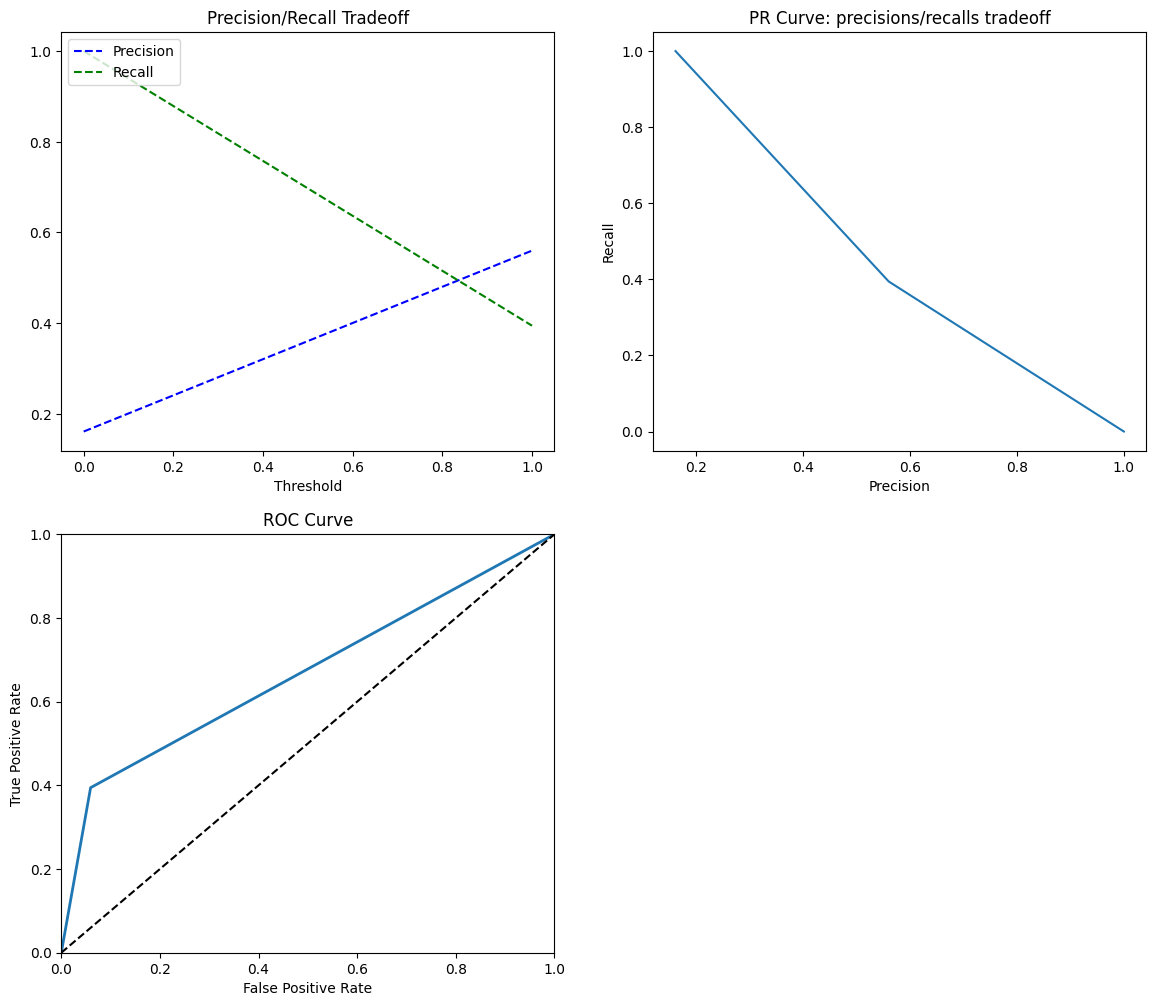

In [114]:
precisions, recalls, thresholds = precision_recall_curve(y_test, lr_clf.predict(X_test_std))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict(X_test_std))
plot_roc_curve(fpr, tpr)

In [115]:
scores_dict = {
    'Logistic Regression': {
        'Train': roc_auc_score(y_train, lr_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, lr_clf.predict(X_test)),
    },
}

/workspaces/ml-classification/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/workspaces/ml-classification/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [89]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_std, y_train)

evaluate(svm_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[857   6]
 [ 48 118]]
ACCURACY SCORE:
0.9475
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.946961    0.951613  0.947522     0.949287      0.947712
recall       0.993048    0.710843  0.947522     0.851945      0.947522
f1-score     0.969457    0.813793  0.947522     0.891625      0.944345
support    863.000000  166.000000  0.947522  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[345  25]
 [ 46  25]]
ACCURACY SCORE:
0.8390
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.882353   0.500000  0.839002    0.691176      0.820795
recall       0.932432   0.352113  0.839002    0.642273      0.839002
f1-score     0.906702   0.413223  0.839002    0.659962      0.827253
support    370.000000  71.000000  0.839002  441.000000    441.000000


## ✔️  Support Vector Machine

In [ ]:
svm_clf = SVC(random_state=42)

param_grid = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
]

search = GridSearchCV(svm_clf, param_grid=param_grid, scoring='roc_auc', cv=3, refit=True, verbose=1)
search.fit(X_train_std, y_train)

In [ ]:
svm_clf = SVC(**search.best_params_)
svm_clf.fit(X_train_std, y_train)

evaluate(svm_clf, X_train_std, X_test_std, y_train, y_test)

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, svm_clf.predict(X_test_std))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, svm_clf.predict(X_test_std))
plot_roc_curve(fpr, tpr)

In [ ]:
scores_dict = {
        'Train': roc_auc_score(y_train, svm_clf.predict(X_train_std)),
        'Test': roc_auc_score(y_test, svm_clf.predict(X_test_std)),
    }

## ✔️ XGBoost Classifier¶


In [116]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

evaluate(xgb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  166.0       1.0     1029.0        1029.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[358  12]
 [ 48  23]]
ACCURACY SCORE:
0.8639
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.881773   0.657143  0.863946    0.769458      0.845608
recall       0.967568   0.323944  0.863946    0.645756      0.863946
f1-score     0.922680   0.433962  0.863946    0.678321      0.843998
support    370.000000  71.000000  0.863946  441.000000    441.000000


In [117]:
scores_dict['XGBoost'] = {
        'Train': roc_auc_score(y_train, xgb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, xgb_clf.predict(X_test)),
    }

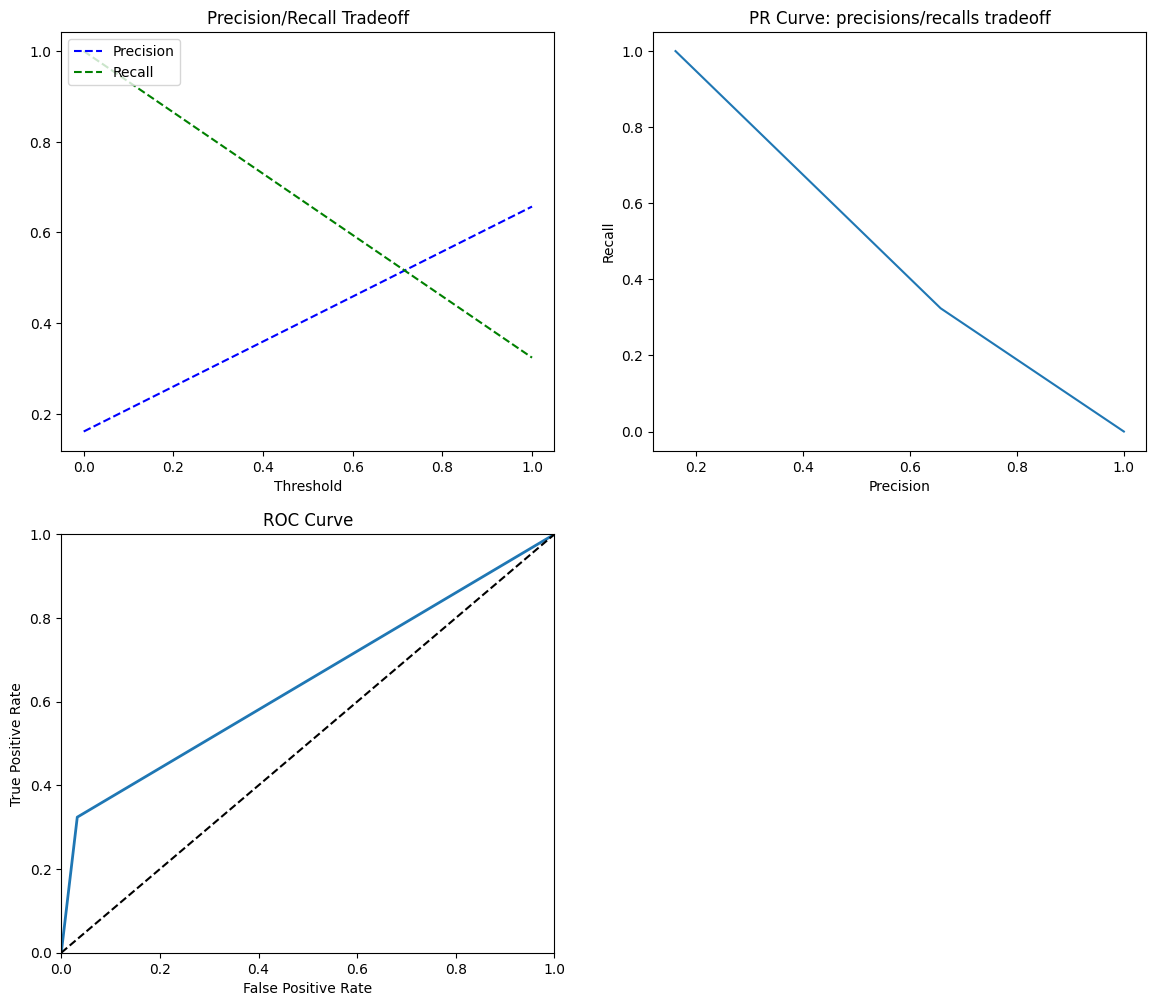

In [118]:
precisions, recalls, thresholds = precision_recall_curve(y_test, xgb_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, xgb_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

Text(0.5, 1.0, 'Feature Importance according to XGBoost')

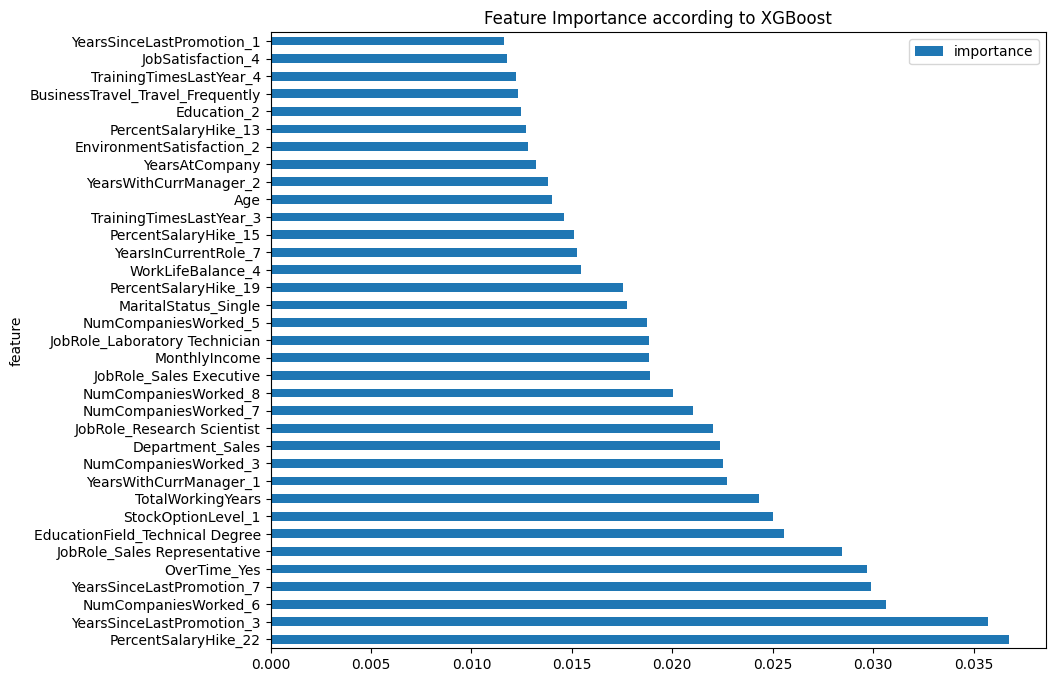

In [120]:
df = feature_imp(X, xgb_clf)[:35]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 8))
plt.title('Feature Importance according to XGBoost')

In [122]:
ml_models = {
    # 'Random Forest': rf_clf, 
    'XGBoost': xgb_clf, 
    'Logistic Regression': lr_clf,
    # 'Support Vector Machine': svm_clf,
    # 'LightGBM': lgb_clf,
    # 'CatBoost': cb_clf,
    # 'AdaBoost': ab_clf
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

XGBOOST                        roc_auc_score: 0.646
LOGISTIC REGRESSION            roc_auc_score: 0.546


/workspaces/ml-classification/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


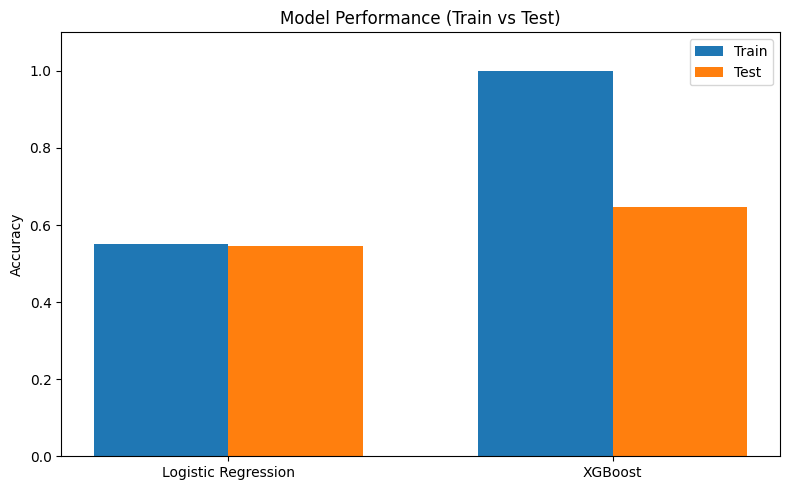

In [125]:
import matplotlib.pyplot as plt

# Your data
scores_dict

# Extract model names and scores
models = list(scores_dict.keys())
train_scores = [scores_dict[model]['Train'] for model in models]
test_scores = [scores_dict[model]['Test'] for model in models]

# Plotting
x = range(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar([p - width/2 for p in x], train_scores, width, label='Train', color='#1f77b4')
ax.bar([p + width/2 for p in x], test_scores, width, label='Test', color='#ff7f0e')

ax.set_ylabel('Accuracy')
ax.set_title('Model Performance (Train vs Test)')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0, 1.1)
ax.legend()
plt.tight_layout()
plt.show()


# TEST MLFLOW

In [126]:
from mlflow import MlflowClient

client = MlflowClient(tracking_uri="http://127.0.0.1:8080")



In [128]:
all_experiments = client.search_experiments()

print(all_experiments)

[<Experiment: artifact_location='mlflow-artifacts:/508888292112728079', creation_time=1751496627334, experiment_id='508888292112728079', last_update_time=1751496627334, lifecycle_stage='active', name='Apple_Models', tags={'mlflow.note.content': 'This is the grocery forecasting project. This '
                        'experiment contains the produce models for apples.',
 'project_name': 'grocery-forecasting',
 'project_quarter': 'Q3-2023',
 'store_dept': 'produce',
 'team': 'stores-ml'}>, <Experiment: artifact_location='/workspaces/ml-classification/here', creation_time=1751496602192, experiment_id='636570389072372989', last_update_time=1751496602192, lifecycle_stage='active', name='my expt', tags={}>, <Experiment: artifact_location='mlflow-artifacts:/0', creation_time=1751496356186, experiment_id='0', last_update_time=1751496356186, lifecycle_stage='active', name='Default', tags={}>]


In [127]:
# Provide an Experiment description that will appear in the UI
experiment_description = (
    "This is the grocery forecasting project. "
    "This experiment contains the produce models for apples."
)

# Provide searchable tags that define characteristics of the Runs that
# will be in this Experiment
experiment_tags = {
    "project_name": "grocery-forecasting",
    "store_dept": "produce",
    "team": "stores-ml",
    "project_quarter": "Q3-2023",
    "mlflow.note.content": experiment_description,
}

# Create the Experiment, providing a unique name
produce_apples_experiment = client.create_experiment(
    name="Apple_Models", tags=experiment_tags
)

In [133]:
import mlflow

# Initiate the MLflow run context
with mlflow.start_run() as run:
    # Log the parameters used for the model fit
    mlflow.log_params(params)

    # Log the error metrics that were calculated during validation
    mlflow.log_metrics(metrics)

    # Log an instance of the trained model for later use
    mlflow.sklearn.log_model(sk_model=xgb_clf, input_example=X_val, name=artifact_path)

NameError: name 'params' is not defined

NameError: name 'mlflow' is not defined